In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data
gdpFullDf = pd.read_csv('CleanedData/gdp_per_hour_worked_filtered.csv', index_col=0)
# Creating columnn for gdp over labor force to match the column in the original article
gdpFullDf['gdp_over_labor_force'] = round(gdpFullDf['gdp'] / gdpFullDf['labor_force'], 2)

CrimeFullDf = pd.read_csv('CleanedData/HomicideCountsByCountry_2007-2022.csv', index_col=0)
CrimeFullDf.rename(columns={'Iso3_code': 'iso3c', 'Country':'country', 'VALUE':'Victim Count'}, inplace=True)

In [3]:
gdpFullDf.head()

,year,iso3c,country,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,hours_worked,...,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c,continent,penn_hours_worked_over_pop,hours_worked_over_pop,hours_worked_over_pop_combined,hours_worked_over_pop_predicted,hours_worked_over_pop_modelled,gdp_over_labor_force
12632,2007,AUS,Australia,20827622.0,10937240.0,9.186995e+11,7.628943e+11,8.544273e+11,1.095250e+12,1803.000000,...,44109.669374,52586.409390,47828.591243,5.0,895.758812,922.244796,922.244796,910.891221,922.244796,78120.92
12633,2007,AUT,Austria,8295487.0,4201262.0,4.360529e+11,3.271376e+11,3.891856e+11,3.644847e+11,1606.428996,...,52565.073969,43937.712891,67645.310343,4.0,829.445365,777.069005,777.069005,751.812698,777.069005,92635.40
12636,2007,BEL,Belgium,10625700.0,4728844.0,5.163070e+11,3.909816e+11,4.709222e+11,4.281119e+11,1593.657532,...,48590.400535,40290.227756,73741.553706,4.0,658.800675,658.928353,658.928353,751.812698,658.928353,99585.05
12654,2007,CAN,Canada,32889025.0,18382598.0,1.509263e+12,1.301593e+12,1.468820e+12,1.384576e+12,1745.000000,...,45889.562129,42098.431220,50845.133236,2.0,898.870758,902.535980,902.535980,872.685869,902.535980,79902.76
12656,2007,CHE,Switzerland,7551117.0,4307257.0,4.924324e+11,3.845359e+11,4.907547e+11,6.135597e+11,1668.900000,...,65213.180537,81254.170050,69663.070107,4.0,943.117746,936.122689,936.122689,814.328625,936.122689,113936.71


In [4]:
gdpFullDf['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland',
       'Czechia', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland',
       'France', 'United Kingdom', 'Greece', 'Croatia', 'Hungary',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Lithuania',
       'Luxembourg', 'Latvia', 'Netherlands', 'Norway', 'New Zealand',
       'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Sweden',
       'United States'], dtype=object)

In [5]:
CrimeFullDf.head()

,iso3c,country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,Victim Count,Source,Unnamed: 13
0,AUS,Australia,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,255.0,MD/Eurostat/GSH 2019 Revision/CTS,NaN
1,AUT,Austria,Europe,Western Europe,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,45.0,UNSDC/Eurostat/CTS/GSH 2023 Revision,NaN
2,CAN,Canada,Americas,Northern America,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,597.0,NSO/OAS/CTS/SDG/GSH 2023 Revision,NaN
3,CZE,Czechia,Europe,Eastern Europe,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,126.0,Eurostat/UNSDC/GSH 2019 Revision/CTS,NaN
4,DEU,Germany,Europe,Western Europe,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,888.0,SDG/CTS/NP,NaN


In [6]:
CrimeFullDf.drop(CrimeFullDf[(CrimeFullDf['iso3c'] == 'BEL') & (CrimeFullDf['Year'] == 2020)].index, axis=0, inplace=True)
CrimeFullDf[CrimeFullDf['iso3c'] == 'NZL'].head(40)

,iso3c,country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,Victim Count,Source,Unnamed: 13
21,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,48.0,WHO Adjusted/UNSDC/NP/CTS,NaN
47,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2008,Counts,51.0,WHO Adjusted/UNSDC/NP/CTS,NaN
75,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2009,Counts,67.0,WHO Adjusted/UNSDC/NP/CTS,NaN
103,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2010,Counts,43.0,WHO Adjusted/UNSDC/NP/CTS,NaN
131,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2011,Counts,39.0,WHO Adjusted/UNSDC/NP/CTS,NaN
160,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2012,Counts,41.0,WHO Adjusted/UNSDC/NP/CTS,NaN
189,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2013,Counts,46.0,WHO Adjusted/UNSDC/NP/CTS,NaN
218,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2014,Counts,43.0,WHO Adjusted/UNSDC/NP/CTS,NaN
247,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2015,Counts,48.0,WHO Adjusted/UNSDC/NP/CTS,NaN
276,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2016,Counts,50.0,WHO Adjusted/UNSDC/NP/CTS,NaN


In [7]:
CrimeSelectColumns = CrimeFullDf[['Year', 'iso3c', 'country', 'Victim Count']]
GdpSelectColumns = gdpFullDf[['year', 'iso3c', 'country', 'gdp_over_labor_force', 'gdp_ppp_over_labor_force', 'gdp_ppp_over_k_hours_worked_c', 'pop']]
GdpSelectColumns.rename(columns={'gdp_over_labor_force': 'GDP per Worker', 'gdp_ppp_over_labor_force':'GDP PPP per Worker', 
                                 'gdp_ppp_over_k_hours_worked_c': 'PPP per Hour Worked', 'year':'Year'}, inplace=True)

/var/folders/gm/cwd29txd7sg1tqmgzvg2jj580000gn/T/ipykernel_56866/3726706730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GdpSelectColumns.rename(columns={'gdp_over_labor_force': 'GDP per Worker', 'gdp_ppp_over_labor_force':'GDP PPP per Worker',


In [8]:
HomAndGdp = pd.merge(CrimeSelectColumns, GdpSelectColumns, on=['Year', 'iso3c'], how='inner')

In [9]:
HomAndGdp.rename(columns={'country_x':'country'}, inplace=True)
HomAndGdp.drop(columns={'country_y'}, inplace=True)

In [10]:
# Adding Victim Count per 100,000 population
HomAndGdp['Victims per 100,000 population'] = round(HomAndGdp['Victim Count'] / (HomAndGdp['pop'] / 100000), 2)
HomAndGdp.head()

,Year,iso3c,country,Victim Count,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked,pop,"Victims per 100,000 population"
0,2007,AUS,Australia,255.0,78120.92,69751.995589,47828.591243,20827622.0,1.22
1,2007,AUT,Austria,45.0,92635.40,77866.496956,67645.310343,8295487.0,0.54
2,2007,CAN,Canada,597.0,79902.76,70805.734407,50845.133236,32889025.0,1.82
3,2007,CZE,Czechia,126.0,36654.90,52175.331212,38682.898921,10298828.0,1.22
4,2007,DEU,Germany,888.0,81831.73,71321.753851,66168.565867,82266372.0,1.08


In [11]:
HomAndGdp.head()

,Year,iso3c,country,Victim Count,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked,pop,"Victims per 100,000 population"
0,2007,AUS,Australia,255.0,78120.92,69751.995589,47828.591243,20827622.0,1.22
1,2007,AUT,Austria,45.0,92635.40,77866.496956,67645.310343,8295487.0,0.54
2,2007,CAN,Canada,597.0,79902.76,70805.734407,50845.133236,32889025.0,1.82
3,2007,CZE,Czechia,126.0,36654.90,52175.331212,38682.898921,10298828.0,1.22
4,2007,DEU,Germany,888.0,81831.73,71321.753851,66168.565867,82266372.0,1.08


In [12]:
HomAndGdp[HomAndGdp['iso3c'] == 'USA'][['Year', 'Victim Count', 'GDP per Worker', 'GDP PPP per Worker', 'PPP per Hour Worked']].corr()

,Year,Victim Count,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked
Year,1.000000,0.694380,0.971054,0.971054,0.961617
Victim Count,0.694380,1.000000,0.767034,0.767034,0.702107
GDP per Worker,0.971054,0.767034,1.000000,1.000000,0.922858
GDP PPP per Worker,0.971054,0.767034,1.000000,1.000000,0.922858
PPP per Hour Worked,0.961617,0.702107,0.922858,0.922858,1.000000


In [13]:
HomAndGdp['country'].unique()

array(['Australia', 'Austria', 'Canada', 'Czechia', 'Germany', 'Spain',
       'Estonia', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Republic of Korea',
       'Lithuania', 'Luxembourg', 'Netherlands', 'Norway', 'New Zealand',
       'Slovakia', 'Slovenia', 'Sweden', 'United States of America',
       'Poland', 'Latvia', 'United Kingdom', 'Belgium', 'Denmark',
       'Portugal', 'Switzerland'], dtype=object)

In [62]:
countryCodes = [
    'AUS', 'AUT', 'CAN', 'CZE', 'DEU', 'ESP', 
    'EST', 'FIN', 'FRA', 'GRC', 'HRV', 'HUN', 
    'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 
    'LTU', 'LUX', 'NLD', 'NOR', 'NZL', 
    'SVK', 'SVN', 'SWE', 'USA' 
    'POL', 'LVA', 'GBR', 'BEL', 'DNK', 
    'PRT', 'CHE'
]

# for country in countryCodes:
#     print(country)
#     print(CrimeFullDf[CrimeFullDf['iso3c'] == country]['year'])

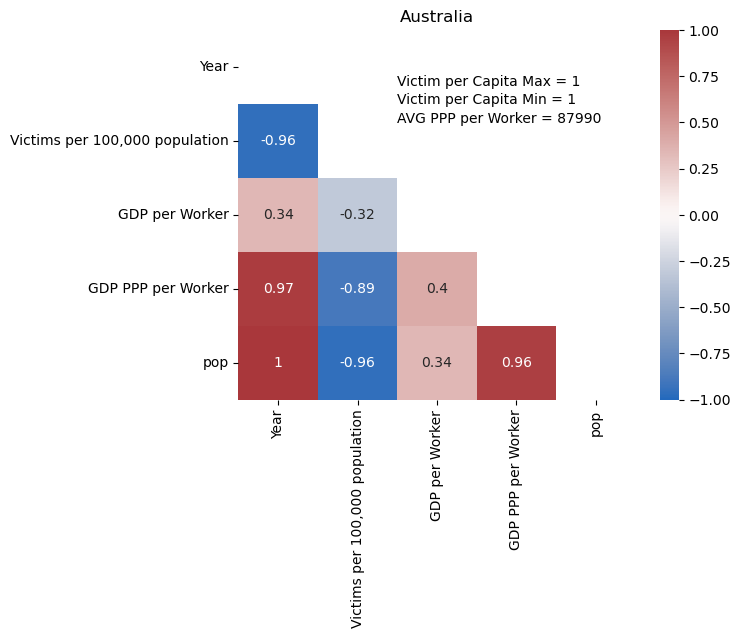

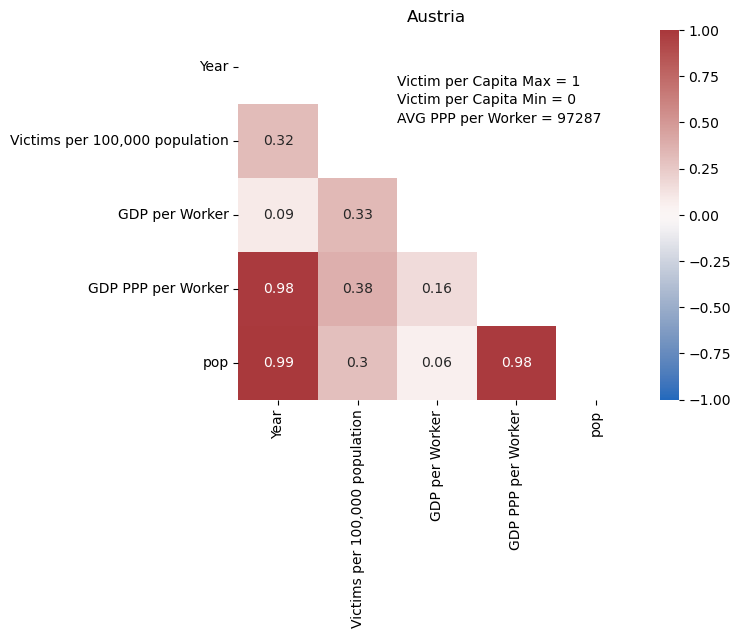

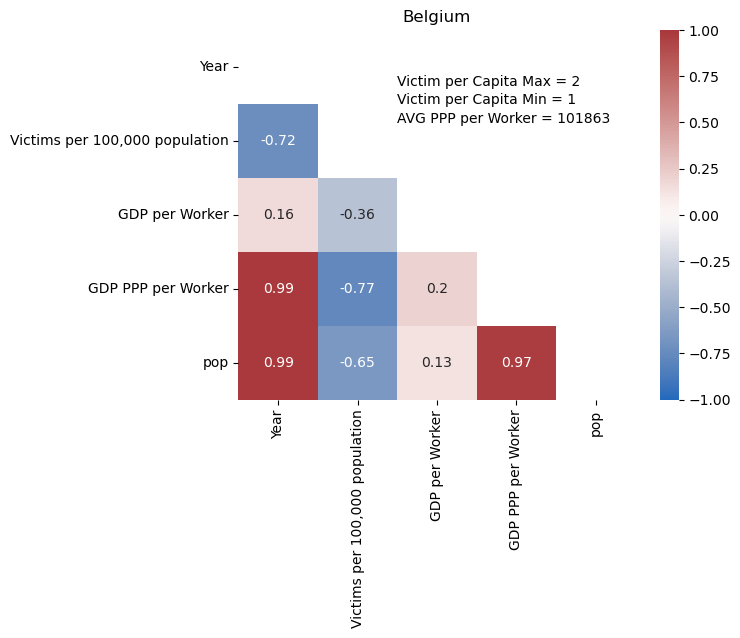

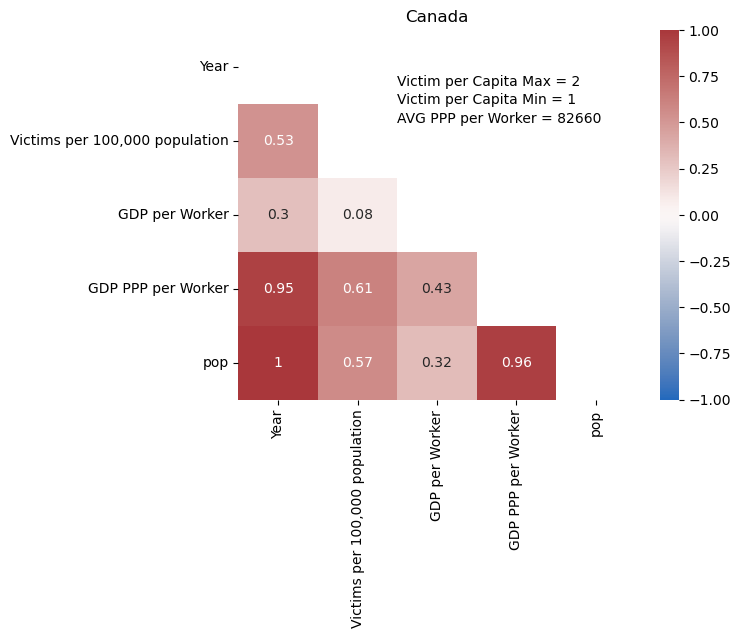

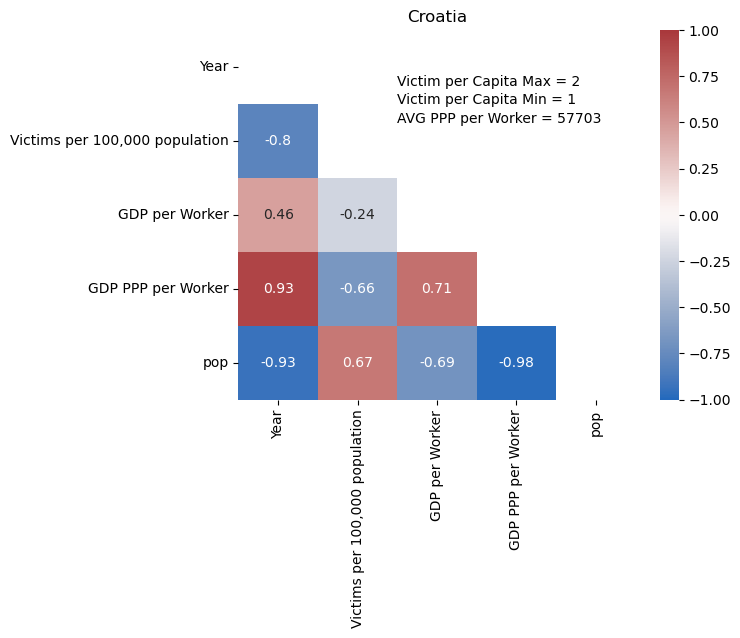

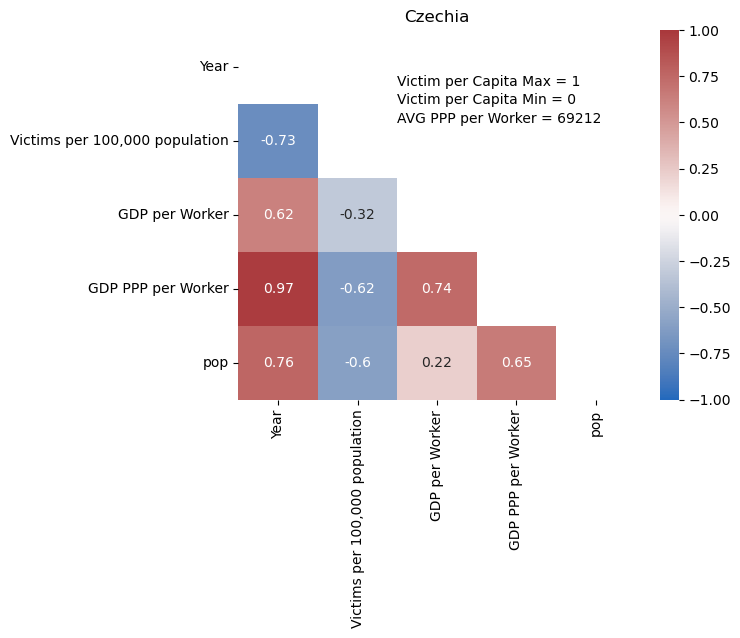

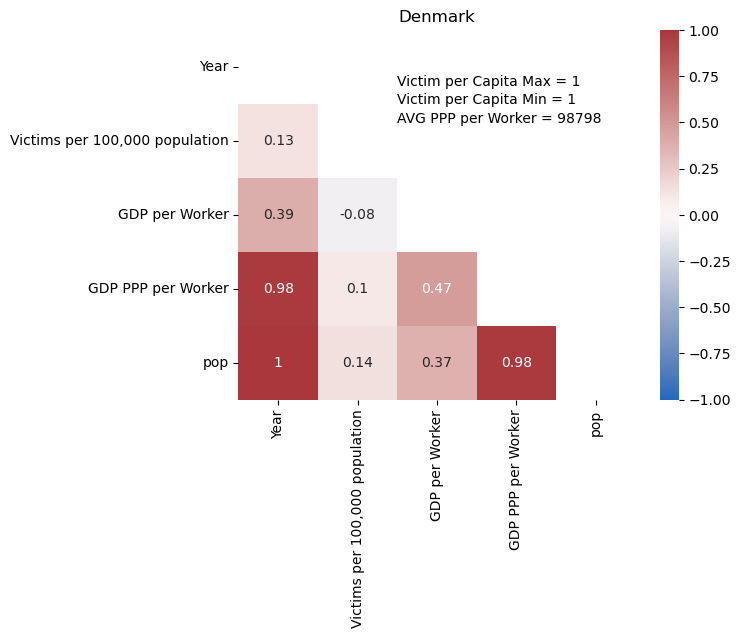

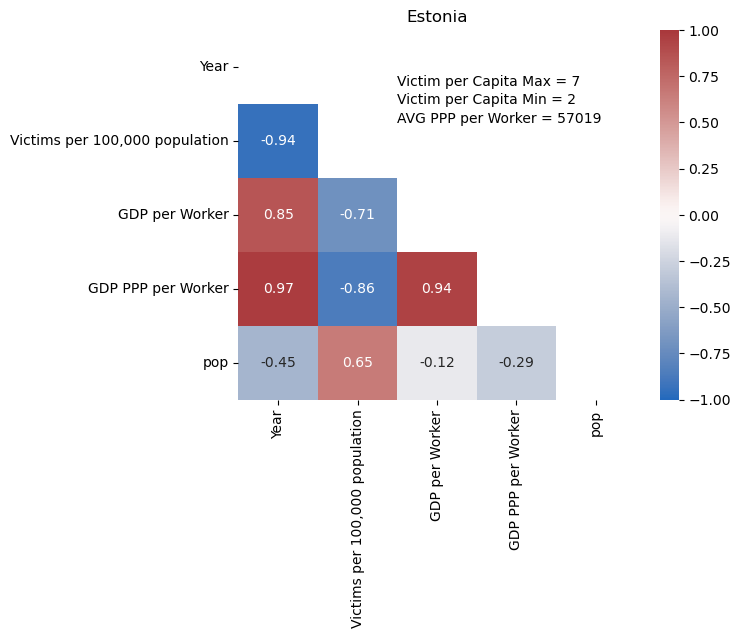

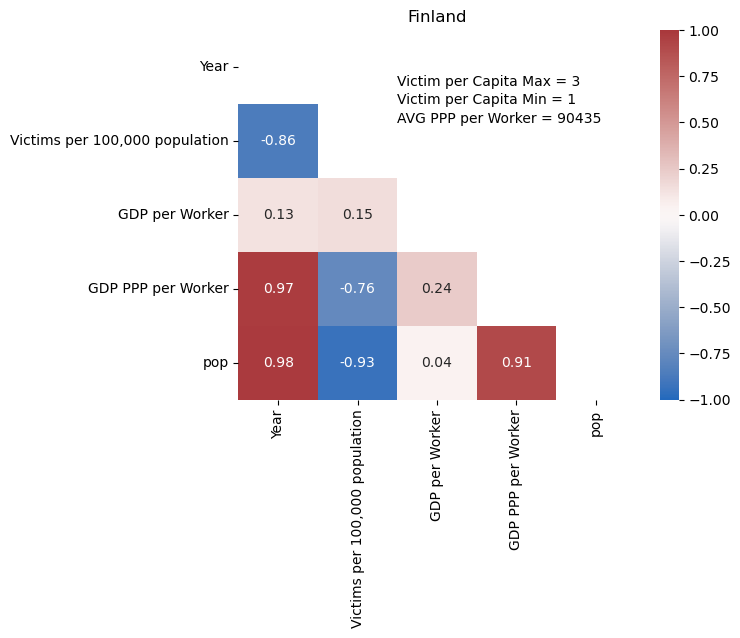

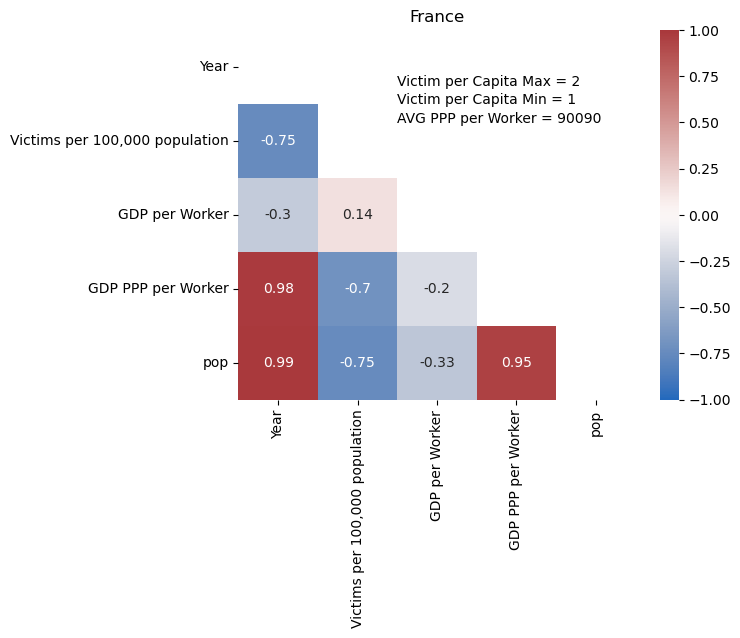

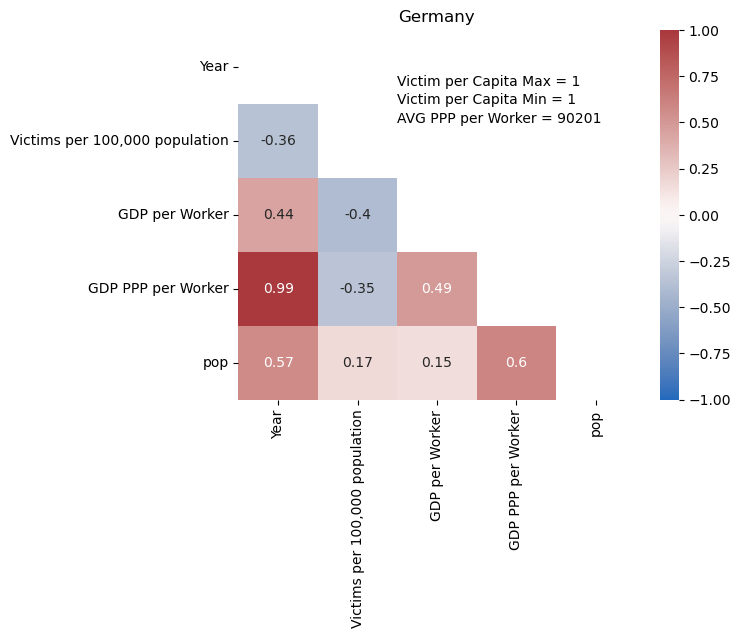

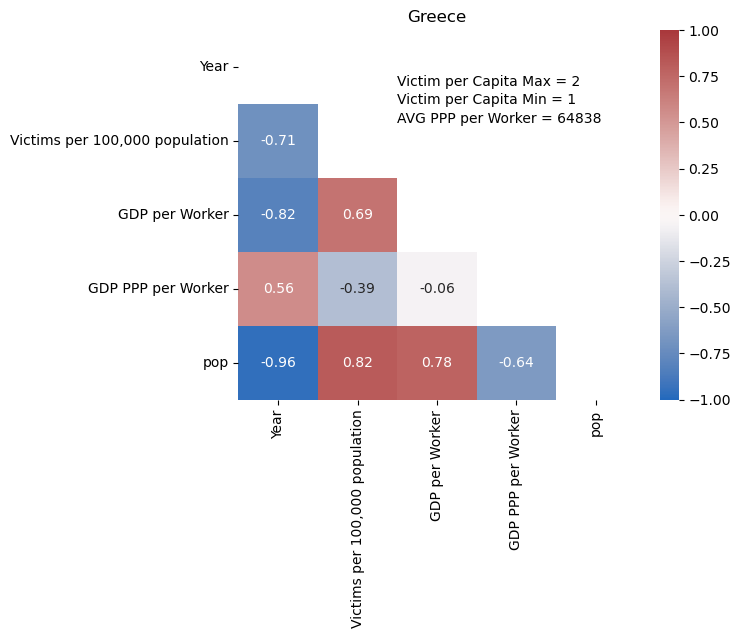

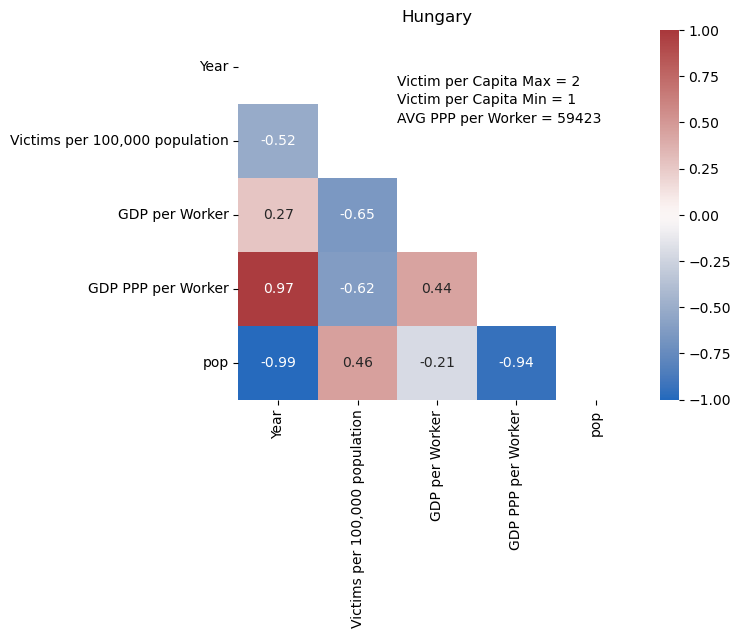

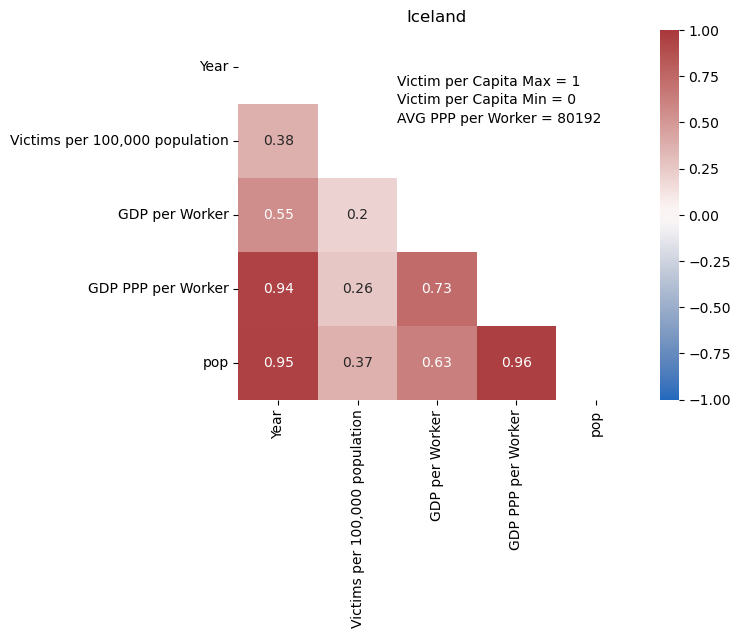

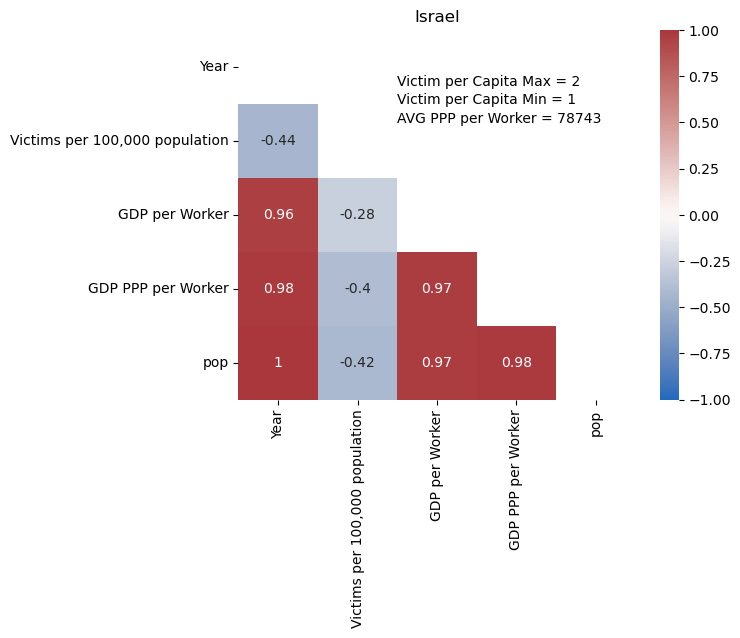

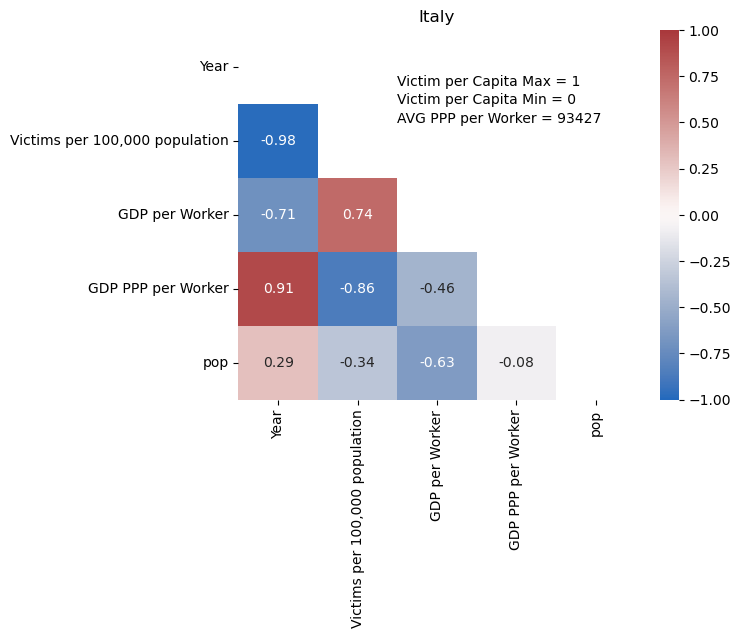

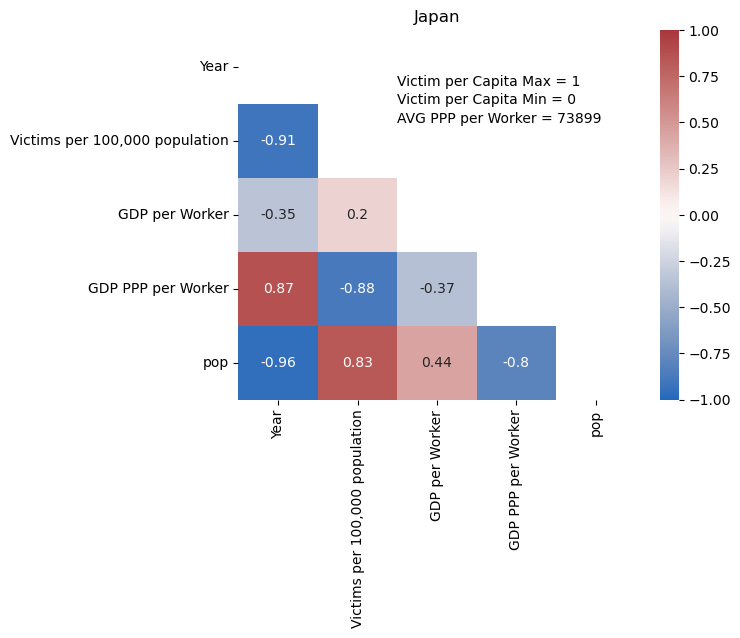

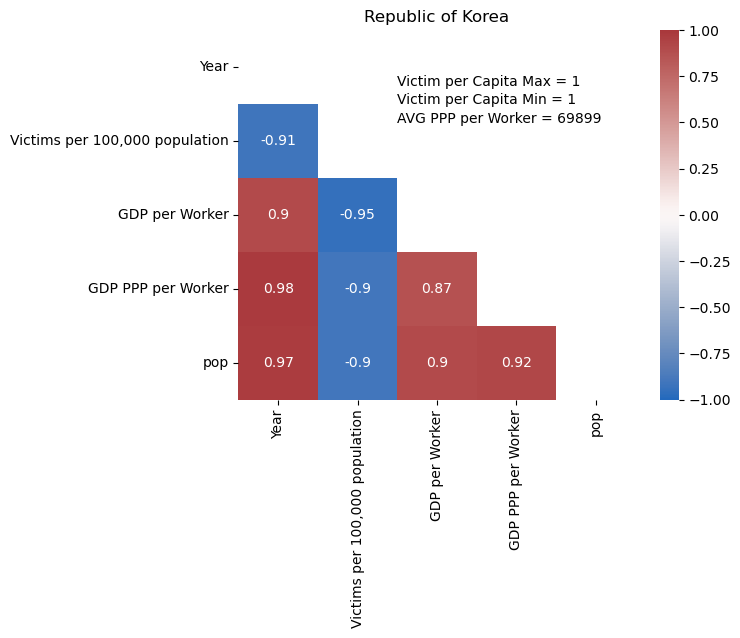

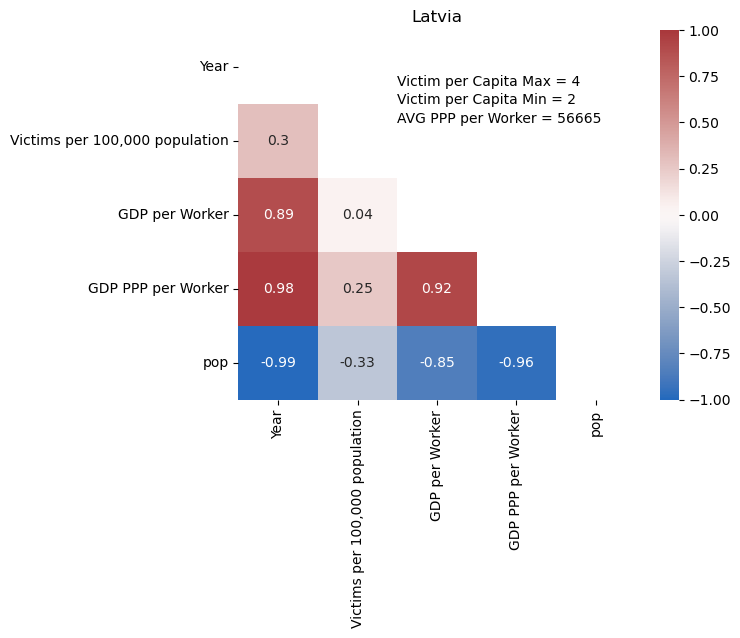

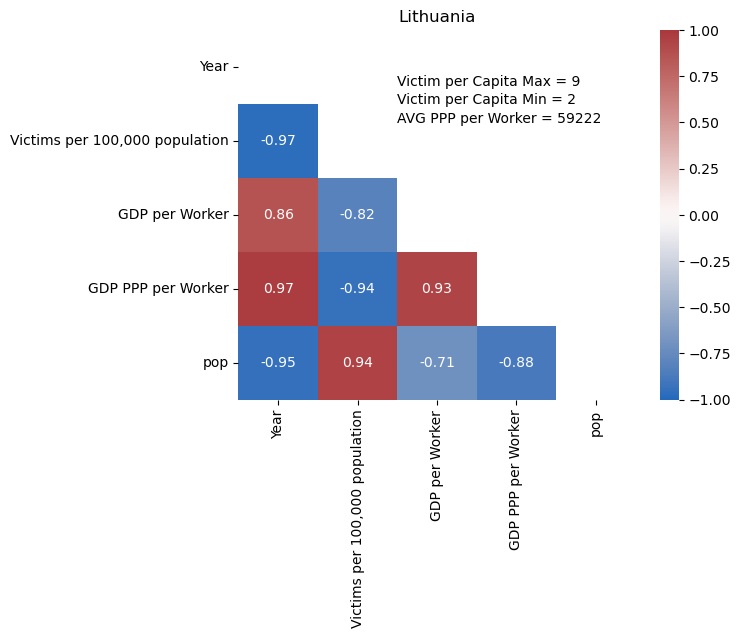

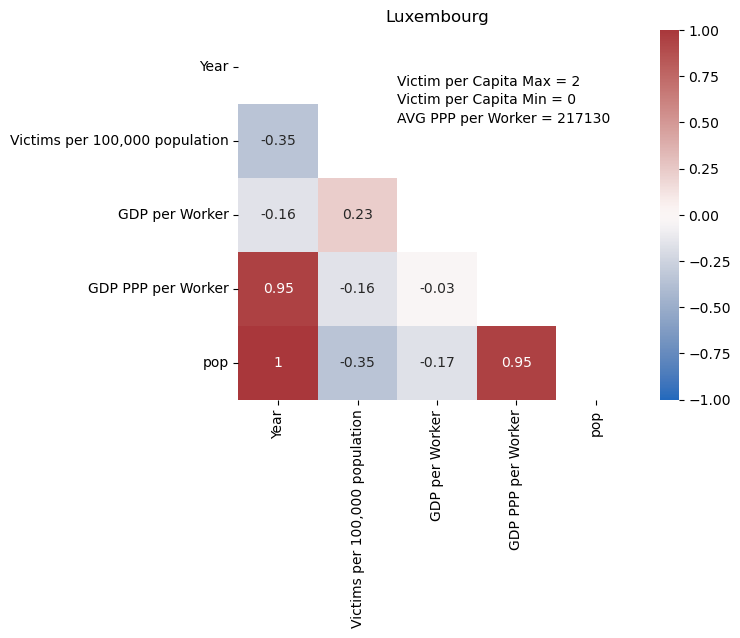

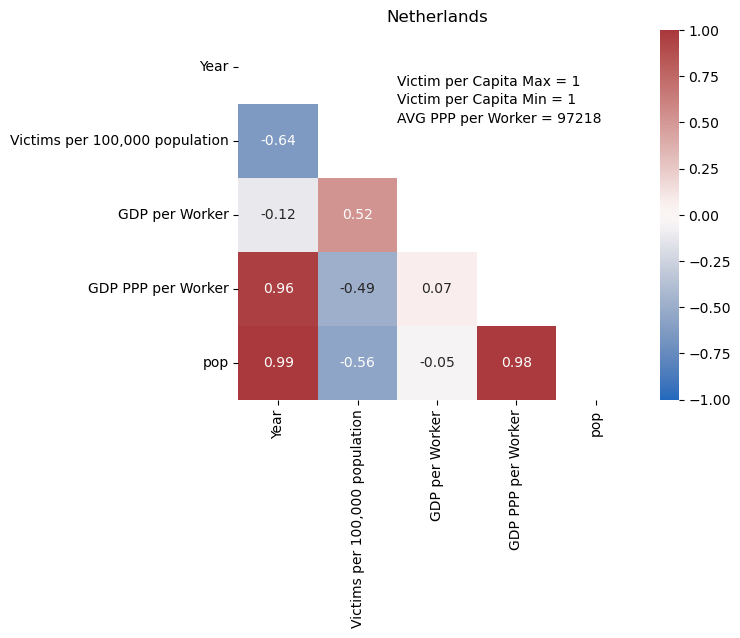

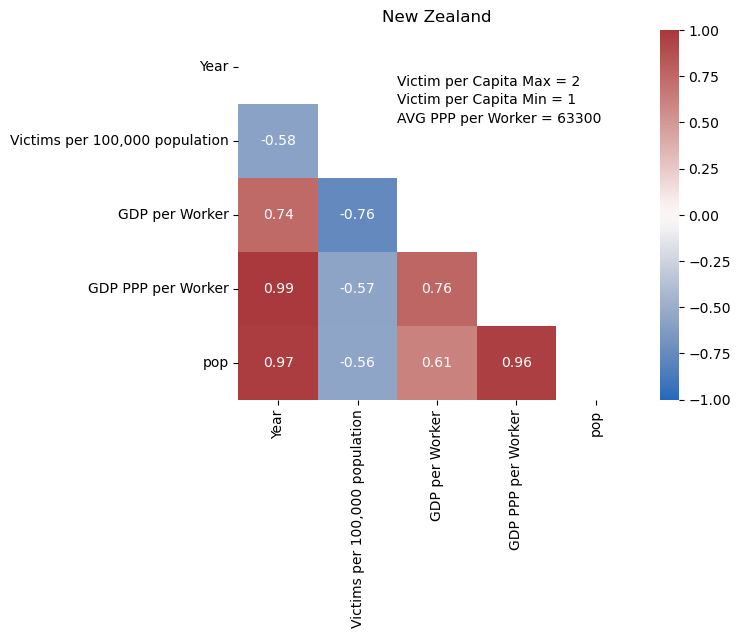

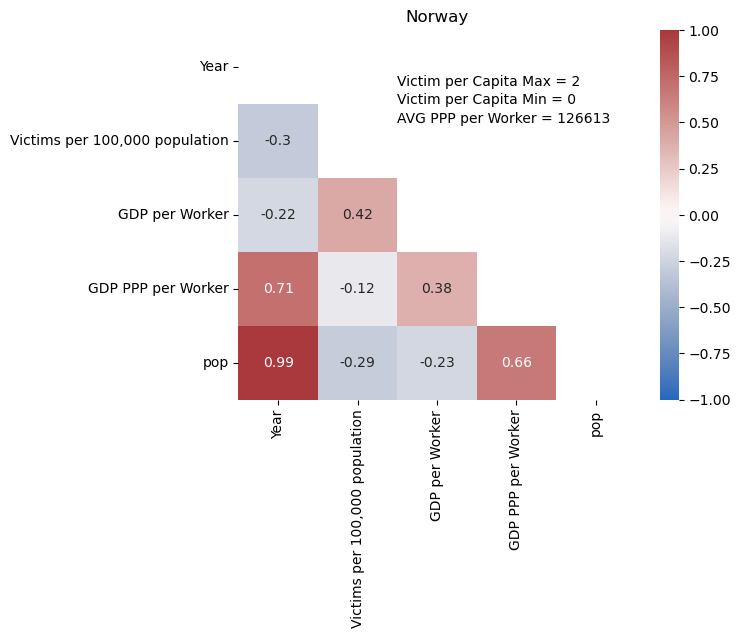

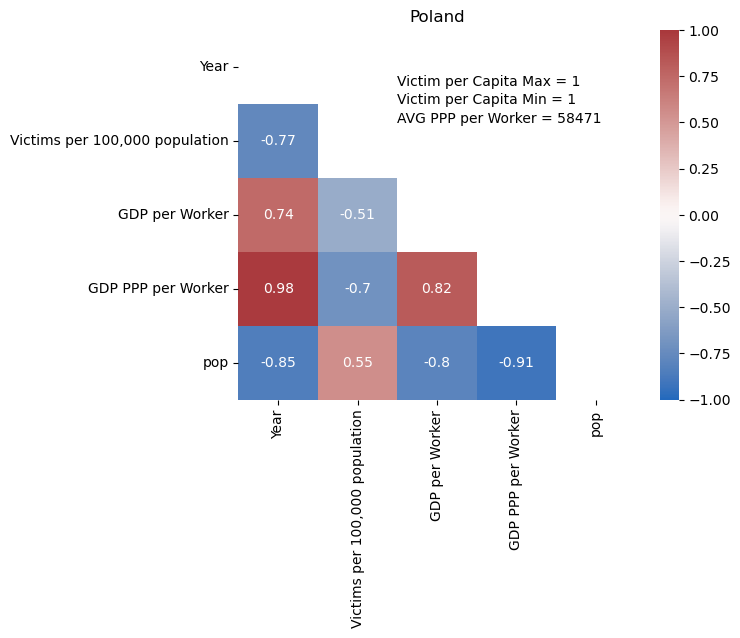

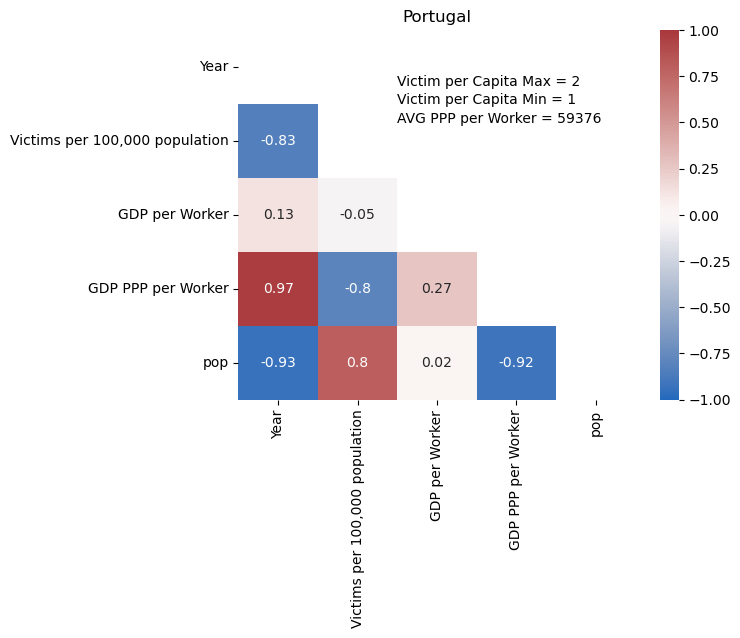

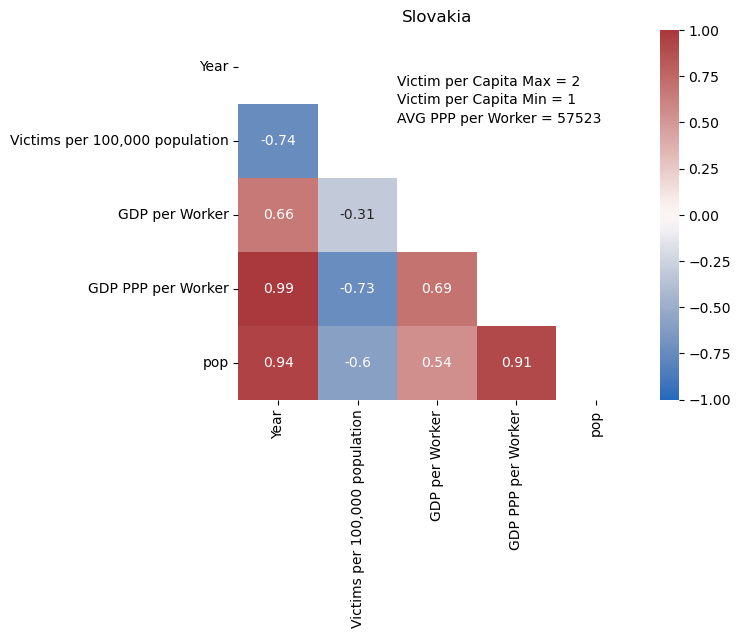

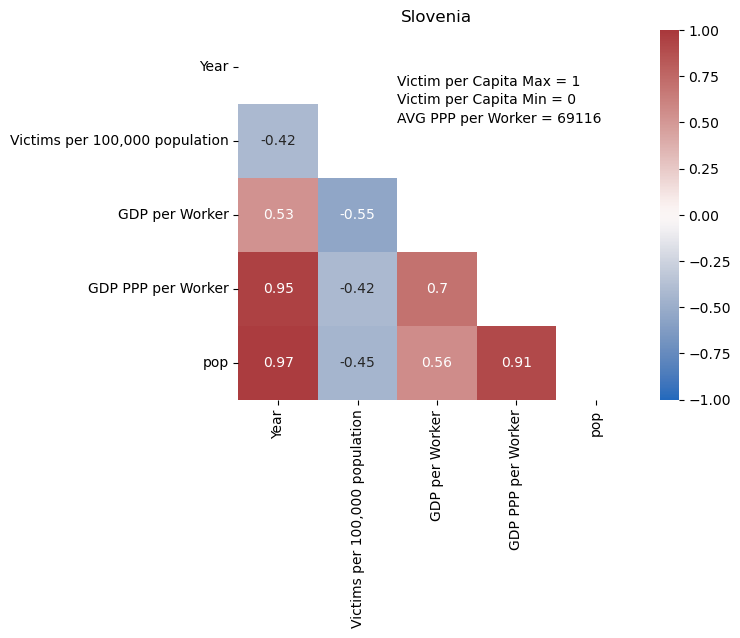

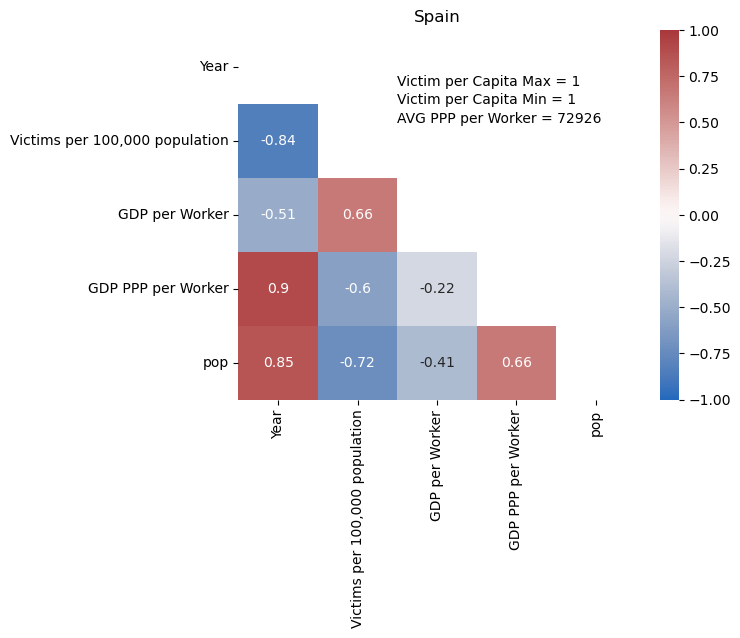

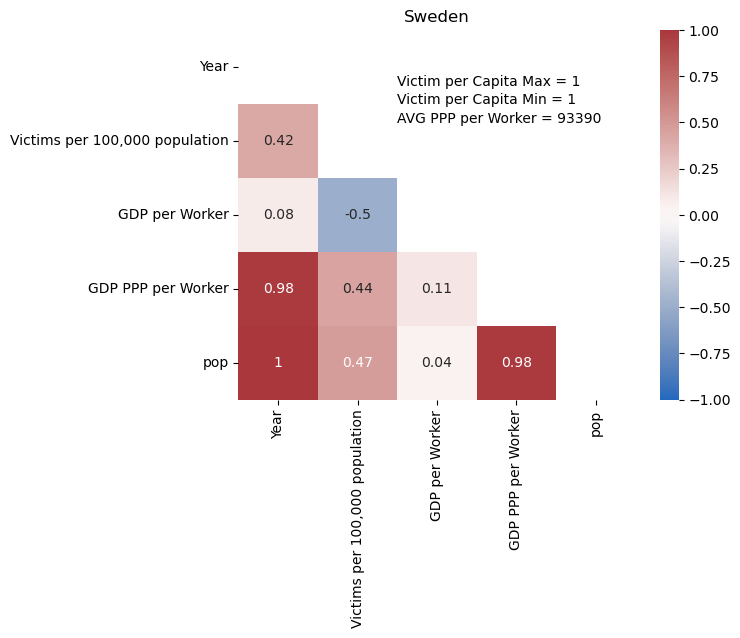

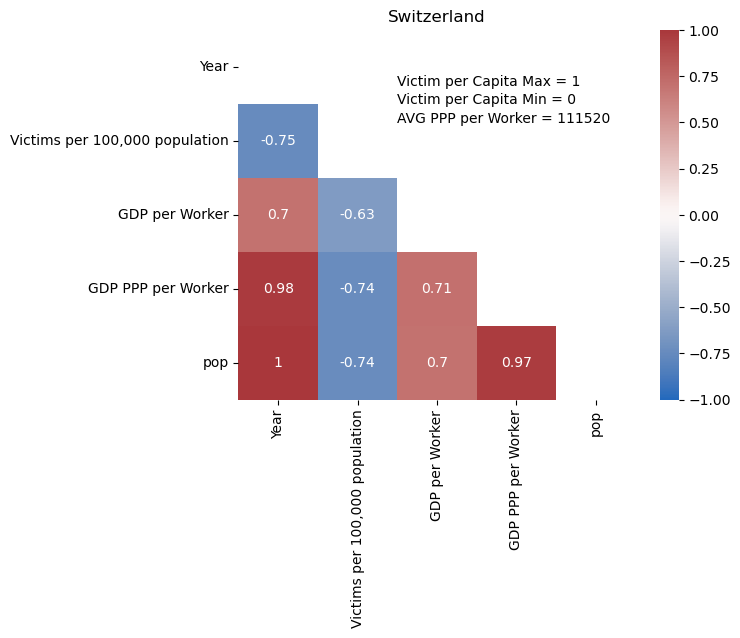

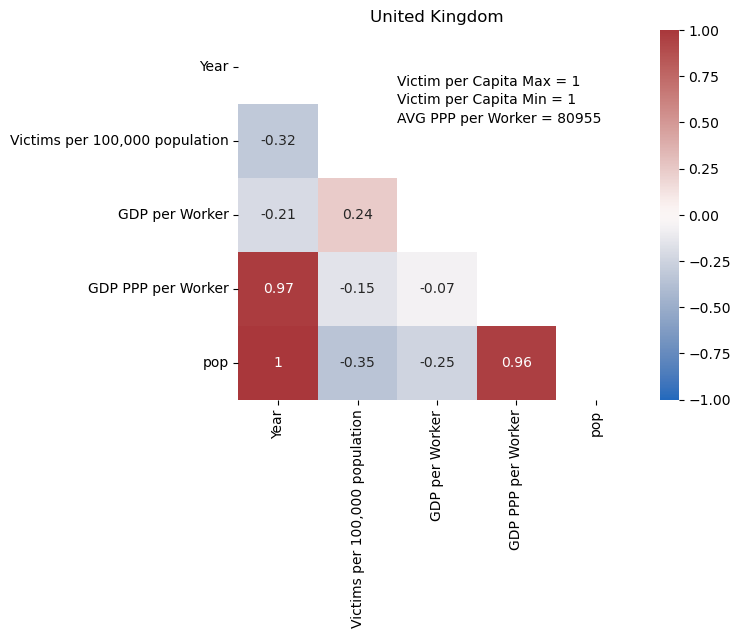

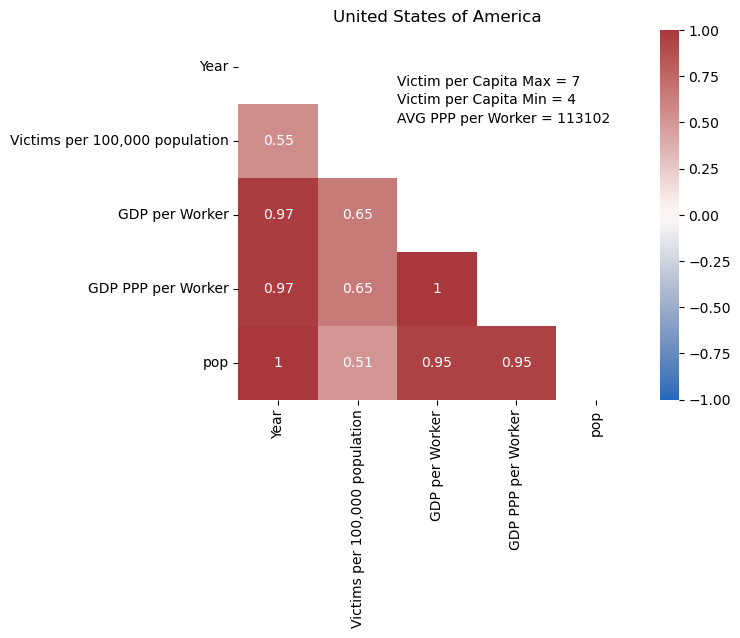

In [25]:
for idex, code in enumerate(countryCodes):
    matrix = HomAndGdp[HomAndGdp['iso3c'] == code][['Year', 'Victims per 100,000 population', 'GDP per Worker', 'GDP PPP per Worker', 'pop']].corr().round(2)
    VictimCountMax = HomAndGdp[HomAndGdp['iso3c'] == code]['Victims per 100,000 population'].max()
    VictimCountMin = HomAndGdp[HomAndGdp['iso3c'] == code]['Victims per 100,000 population'].min()
    PPPperWorkerAvg = HomAndGdp[HomAndGdp['iso3c'] == code]['GDP PPP per Worker'].mean()

    mask = np.triu(np.ones_like(matrix, dtype=bool))
    heatMap = sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
    ax = plt.gca()

    plt.text(.4, .85, "Victim per Capita Max = {}".format(round(VictimCountMax)), transform=ax.transAxes)
    plt.text(.4, .8, "Victim per Capita Min = {}".format(round(VictimCountMin)), transform=ax.transAxes)
    plt.text(.4, .75, "AVG PPP per Worker = {}".format(round(PPPperWorkerAvg)), transform=ax.transAxes)
    plt.title(HomAndGdp[(HomAndGdp['iso3c'] == code) & (HomAndGdp['Year'] == 2015)]['country'].to_string(index=False))
    fig = heatMap.get_figure()
    # fig.savefig('GdpAndCrime_HeatMap_{}'.format(HomAndGdp[(HomAndGdp['iso3c'] == code) & (HomAndGdp['Year'] == 2015)]['country'].to_string(index=False)), dpi=300, bbox_inches='tight')
    plt.show()

In [46]:
HomAndGdp[HomAndGdp['iso3c'] == 'ITA'][['GDP per Worker', 'GDP PPP per Worker', 'Victim Count', 'Year']].corr()

,GDP per Worker,GDP PPP per Worker,Victim Count,Year
GDP per Worker,1.00,-0.46,0.72,-0.71
GDP PPP per Worker,-0.46,1.00,-0.88,0.91
Victim Count,0.72,-0.88,1.00,-0.98
Year,-0.71,0.91,-0.98,1.00


In [47]:
HomAndGdp['Pop in millions'] = round(HomAndGdp['pop'] / 1000000, 2)

In [48]:
HomAndGdp.head()

,Year,iso3c,country,Victim Count,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked,pop,"Victims per 100,000 population",Pop in millions
0,2007,AUS,Australia,255.00,78120.92,69752.00,47828.59,20827622.00,1.22,20.83
1,2007,AUT,Austria,45.00,92635.40,77866.50,67645.31,8295487.00,0.54,8.30
2,2007,CAN,Canada,597.00,79902.76,70805.73,50845.13,32889025.00,1.82,32.89
3,2007,CZE,Czechia,126.00,36654.90,52175.33,38682.90,10298828.00,1.22,10.30
4,2007,DEU,Germany,888.00,81831.73,71321.75,66168.57,82266372.00,1.08,82.27


In [49]:
for index, code in enumerate(countryCodes):
    Co2Gdp = HomAndGdp[HomAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Victims per 100,000 population', 'Year']].corr().iloc[0,2].round(2)
    Co2Ppp = HomAndGdp[HomAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Victims per 100,000 population', 'Year']].corr().iloc[1,2].round(2)
    if (Co2Gdp < -.75 or Co2Ppp < -.75):
        print(HomAndGdp[(HomAndGdp['iso3c'] == code) & (HomAndGdp['Year'] == 2015)]['country'].to_string(index=False))

Australia
Belgium
Estonia
Finland
Italy
Japan
Republic of Korea
Lithuania
New Zealand
Portugal


In [50]:
for index, code in enumerate(countryCodes):
    Co2Gdp = HomAndGdp[HomAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Victims per 100,000 population', 'Year']].corr().iloc[0,2].round(2)
    Co2Ppp = HomAndGdp[HomAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Victims per 100,000 population', 'Year']].corr().iloc[1,2].round(2)
    if (Co2Ppp < -.74 or Co2Ppp > .74):
        print(HomAndGdp[(HomAndGdp['iso3c'] == code) & (HomAndGdp['Year'] == 2015)]['country'].to_string(index=False))

Australia
Belgium
Estonia
Finland
Italy
Japan
Republic of Korea
Lithuania
Portugal


In [51]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
AvgHom = pd.DataFrame(columns = ['country', 'iso3c', 'Avg Victims per 100,000 population', 'Avg Population'])
for index, code in enumerate(countryCodes):
    popMean = round(HomAndGdp[HomAndGdp['iso3c'] == code]['pop'].mean(), 2)
    homMean = round(HomAndGdp[HomAndGdp['iso3c'] == code]['Victims per 100,000 population'].mean(), 2)
    newRow = pd.DataFrame([{'country':HomAndGdp[HomAndGdp['iso3c'] == code]['country'].unique()[0], 'iso3c':code, 
                            'Avg Victims per 100,000 population':homMean, 'Avg Population':popMean}])
    AvgHom = pd.concat([AvgHom, newRow], ignore_index=True)

In [52]:
AvgHom.sort_values('Avg Victims per 100,000 population', ascending=True)

,country,iso3c,"Avg Victims per 100,000 population",Avg Population
19,Japan,JPN,0.32,127262639.53
16,Iceland,ISL,0.57,334554.73
4,Switzerland,CHE,0.59,8203955.12
30,Slovenia,SVN,0.68,2064755.94
25,Norway,NOR,0.68,5124292.94
1,Austria,AUT,0.74,8624005.38
8,Spain,ESP,0.74,46661786.94
20,Republic of Korea,KOR,0.74,50629131.81
24,Netherlands,NLD,0.76,16965388.25
18,Italy,ITA,0.76,59689442.06


In [53]:
HomAndGdp[HomAndGdp['iso3c'] == 'EST']['Victims per 100,000 population'].max()

7.16

In [54]:
for index, code in enumerate(countryCodes):
    homMax = HomAndGdp[HomAndGdp['iso3c'] == code]['Victims per 100,000 population'].max()
    homMin = HomAndGdp[HomAndGdp['iso3c'] == code]['Victims per 100,000 population'].min()
    homRange = homMax - homMin
    print(code, homRange)

AUS 0.48
AUT 0.48
BEL 0.9699999999999998
CAN 0.8
CHE 0.22999999999999998
CZE 0.77
DEU 0.41999999999999993
DNK 0.68
ESP 0.4600000000000001
EST 5.21
FIN 1.29
FRA 0.5700000000000001
GBR 0.5299999999999999
GRC 0.9299999999999999
HRV 1.06
HUN 1.6
ISL 1.36
ISR 0.75
ITA 0.6000000000000001
JPN 0.28
KOR 0.56
LTU 6.960000000000001
LUX 1.97
LVA 1.8800000000000003
NLD 0.38
NOR 1.7800000000000002
NZL 0.8300000000000001
POL 0.44000000000000006
PRT 1.1099999999999999
SVK 1.01
SVN 0.76
SWE 0.5
USA 2.46


In [20]:
AvgHom.sort_values('Avg Population', ascending=False)

,country,iso3c,"Avg Victims per 100,000 population",Avg Population
32,United States of America,USA,5.31,318891432.25
16,Japan,JPN,0.32,127262639.53
10,Germany,DEU,0.93,81962172.80
9,France,FRA,1.23,66101480.00
31,United Kingdom,GBR,1.10,64536837.67
15,Italy,ITA,0.76,59689442.06
17,Republic of Korea,KOR,0.74,50629131.81
28,Spain,ESP,0.74,46661786.94
24,Poland,POL,0.82,37971856.60
3,Canada,CAN,1.79,35720711.06


In [55]:
positiveCountries = [
   'Canada', 'United States of America'
]

HomAndGdpPositiveCountries = HomAndGdp[HomAndGdp['country'].isin(positiveCountries)]

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


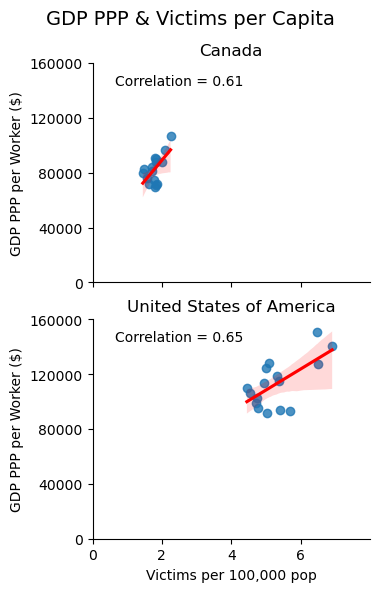

In [22]:
def annotatePerCap(data, **kws):
    r = data[['GDP PPP per Worker', 'Victims per 100,000 population']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpPositiveCountries, col='country', col_wrap=1, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victims per 100,000 population', y='GDP PPP per Worker', line_kws={"color": "red"})
g.map_dataframe(annotatePerCap)
plt.xlim([0, 8])
plt.xticks([0, 2, 4, 6])
plt.ylim([0, 160000])
plt.yticks([0, 40000, 80000, 120000, 160000])


axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(positiveCountries[i])
    ax.set_xlabel("Victims per 100,000 pop")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.subplots_adjust(top=0.89)
g.figure.suptitle('GDP PPP & Victims per Capita', fontsize=14)
g.savefig('HomAndGdp_USACanVictimPerCapCorrPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


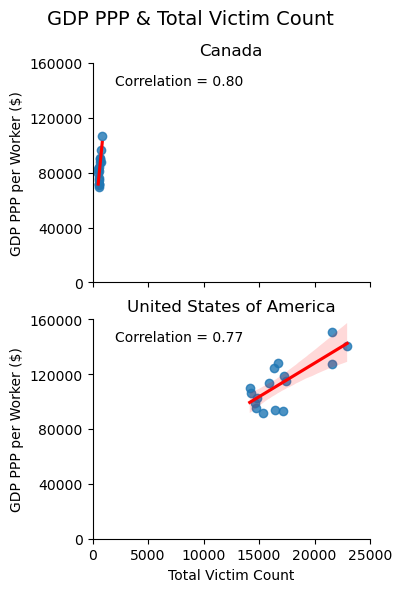

In [20]:
def annotatePerCap(data, **kws):
    r = data[['GDP PPP per Worker', 'Victim Count']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpPositiveCountries, col='country', col_wrap=1, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victim Count', y='GDP PPP per Worker', line_kws={"color": "red"})
g.map_dataframe(annotatePerCap)
plt.xlim([0, 25000])
plt.xticks([0, 5000, 10000, 15000, 20000, 25000])
plt.ylim([0, 160000])
plt.yticks([0, 40000, 80000, 120000, 160000])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(positiveCountries[i])
    ax.set_xlabel("Total Victim Count")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.subplots_adjust(top=0.89)
g.figure.suptitle('GDP PPP & Total Victim Count', fontsize=14)
g.savefig('HomAndGdp_USACanTotalVictimCorrPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


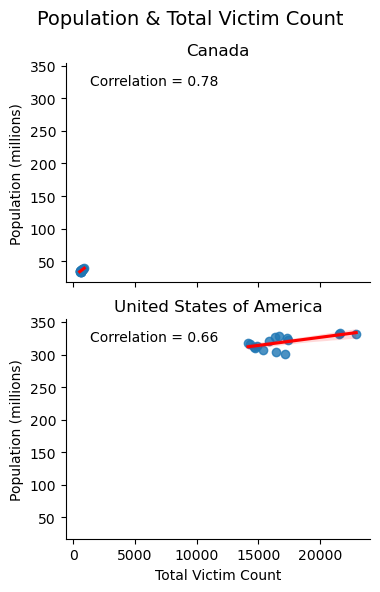

In [46]:
def annotatePerCap(data, **kws):
    r = data[['Victim Count', 'Pop in millions']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpPositiveCountries, col='country', col_wrap=1, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victim Count', y='Pop in millions', line_kws={"color": "red"})
g.map_dataframe(annotatePerCap)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(positiveCountries[i])
    ax.set_xlabel("Total Victim Count")
    ax.set_ylabel("Population (millions)")

g.figure.subplots_adjust(top=0.89)
g.figure.suptitle('Population & Total Victim Count', fontsize=14)
g.savefig('HomAndGdp_USACanPopulationCorrPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


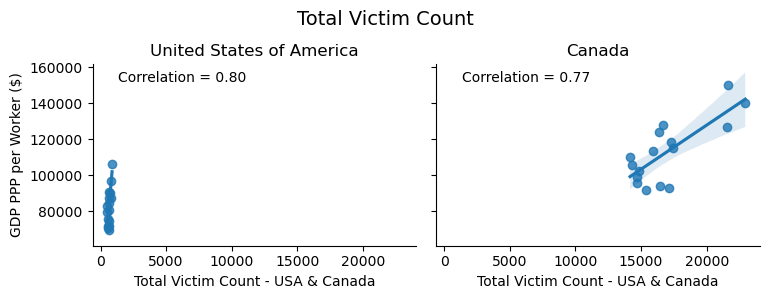

In [37]:
def annotate(data, **kws):
    r = data[['GDP PPP per Worker', 'Victim Count']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpPositiveCountries, col='country', col_wrap=2, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victim Count', y='GDP PPP per Worker')
g.map_dataframe(annotate)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(positiveCountries[i])
    ax.set_xlabel("Total Victim Count - USA & Canada")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.subplots_adjust(top=0.8)
g.figure.suptitle('Total Victim Count', fontsize=14)
g.savefig('HomAndGdp_USACanVictimCountPosCorrRegPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


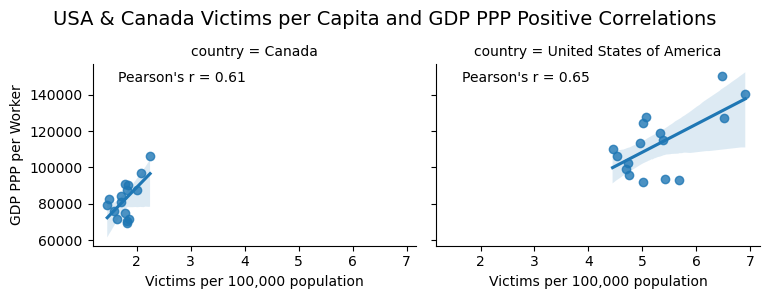

In [73]:
def annotate(data, **kws):
    r = data[['GDP PPP per Worker', 'Victims per 100,000 population']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpPositiveCountries, col='country', col_wrap=2, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victims per 100,000 population', y='GDP PPP per Worker')
g.map_dataframe(annotate)
g.figure.subplots_adjust(top=0.8)
g.figure.suptitle('USA & Canada Victims per Capita and GDP PPP Positive Correlations', fontsize=14)
g.savefig('HomAndGdp_USACanVictimPerCapPosCorrRegPlot.png', dpi=300)

In [ ]:
sns.lmplot(HomAndGdp[HomAndGdp['iso3c'] == 'ESP'], x='Victims per 100,000 population', y='GDP per Worker')
plt.xlim([0, 2])
plt.xticks([0, .5, 1, 1.5, 2])
plt.ylim([0, 120000])

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


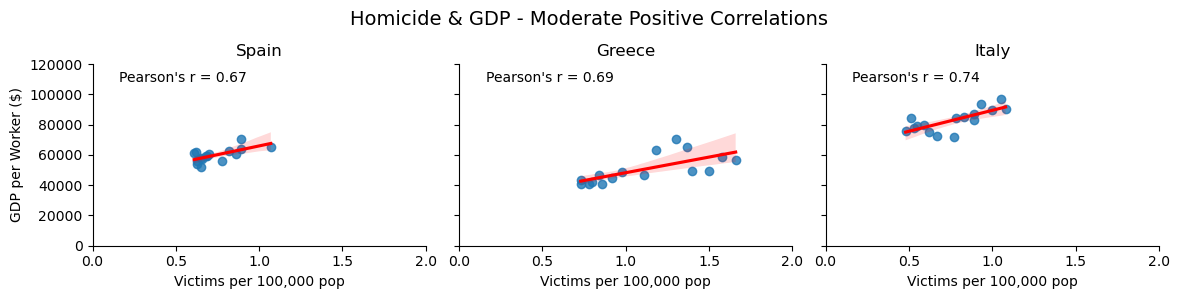

In [67]:
ModeratePosCountries = [
    'Spain', 'Greece', 'Italy'
]
HomAndGdpModeratePosCountries = HomAndGdp[HomAndGdp['country'].isin(ModeratePosCountries)]

def annotate(data, **kws):
    r = data[['GDP per Worker', 'Victims per 100,000 population']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpModeratePosCountries, col='country', col_wrap=3, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victims per 100,000 population', y='GDP per Worker', line_kws={"color": "red"})
g.map_dataframe(annotate)
plt.subplots_adjust(wspace=0.1)
plt.xlim([0, 2])
plt.xticks([0, .5, 1, 1.5, 2])
plt.ylim([0, 120000])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(ModeratePosCountries[i])
    ax.set_xlabel("Victims per 100,000 pop")
    ax.set_ylabel("GDP per Worker ($)")

g.figure.subplots_adjust(top=0.8)
g.figure.suptitle('Homicide & GDP - Moderate Positive Correlations', fontsize=14)
g.savefig('CrimePlots/HomAndGdp_ModeratePosCorrRegPlot.png', dpi=300)

In [60]:
HomAndGdp['country'].unique()

array(['Australia', 'Austria', 'Canada', 'Czechia', 'Germany', 'Spain',
       'Estonia', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Republic of Korea',
       'Lithuania', 'Luxembourg', 'Netherlands', 'Norway', 'New Zealand',
       'Slovakia', 'Slovenia', 'Sweden', 'United States of America',
       'Poland', 'Latvia', 'United Kingdom', 'Belgium', 'Denmark',
       'Portugal', 'Switzerland'], dtype=object)

In [63]:
negativeCountries = [
'Australia', 'Estonia', 'Finland', 'Italy', 
'Japan', 'Republic of Korea', 'Lithuania', 'Belgium', 'Portugal'
]

HomAndGdpNegativeCountries = HomAndGdp[HomAndGdp['country'].isin(negativeCountries)]

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


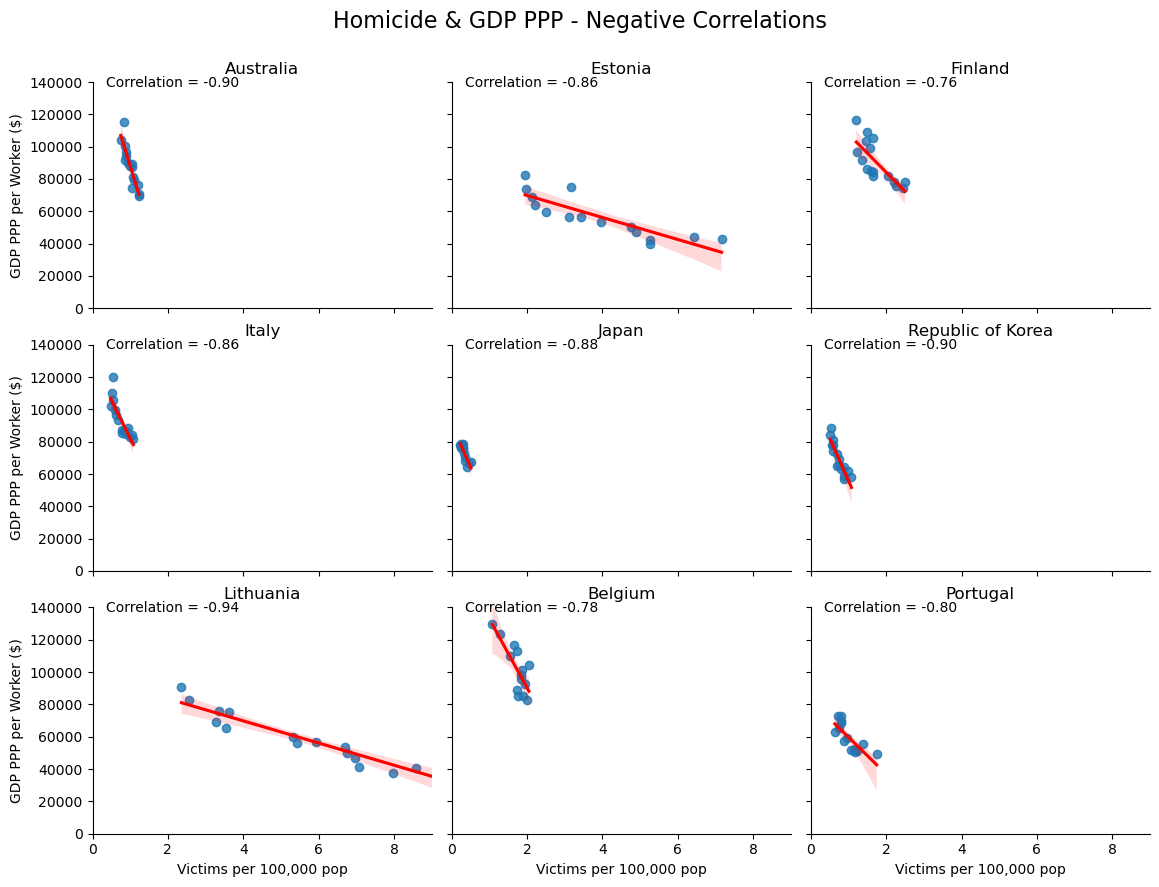

In [68]:
def annotate(data, **kws):
    r = data[['GDP PPP per Worker', 'Victims per 100,000 population']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.04, .98, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpNegativeCountries, col='country', col_wrap=3, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victims per 100,000 population', y='GDP PPP per Worker', line_kws={"color": "red"})
g.map_dataframe(annotate)
plt.xlim([0, 9])
plt.xticks([0, 2, 4, 6, 8])
plt.ylim([0, 140000])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(negativeCountries[i])
    ax.set_xlabel("Victims per 100,000 pop")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.subplots_adjust(top=0.9)
g.figure.suptitle('Homicide & GDP PPP - Negative Correlations', fontsize=16)
g.savefig('CrimePlots/HomAndGdp_NegativeCorrRegPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


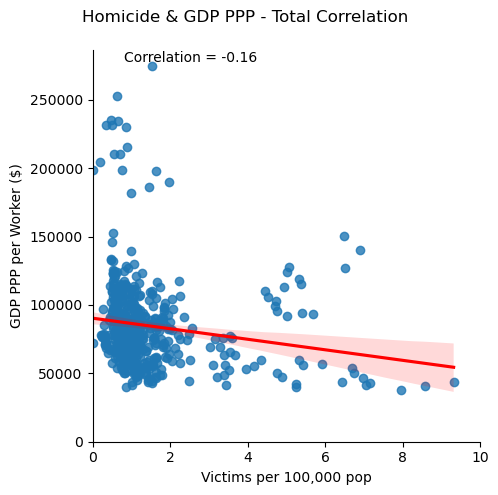

In [44]:
#Total Correlations
g = sns.lmplot(data=HomAndGdp, x='Victims per 100,000 population', y='GDP PPP per Worker', line_kws={"color": "red"})
ax = plt.gca()
r = HomAndGdp[['GDP PPP per Worker', 'Victims per 100,000 population']].corr().iloc[1,0]
plt.text(.08, .97, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
plt.xlim([0, 10])
plt.yticks([0, 50000, 100000, 150000, 200000, 250000])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_xlabel("Victims per 100,000 pop")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.subplots_adjust(top=.9)
g.figure.suptitle('Homicide & GDP PPP - Total Correlation', fontsize=12)
g.savefig('HomAndGdpPPP_TotalCorrelationPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


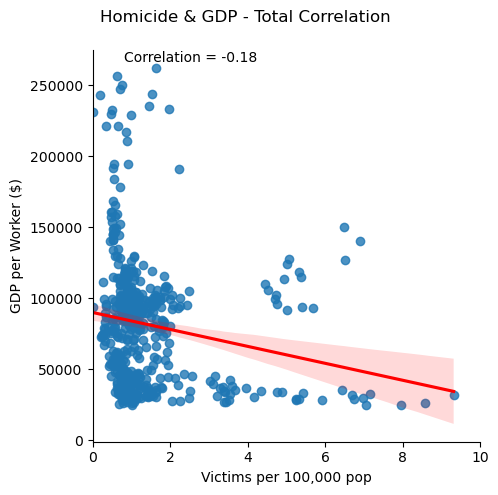

In [45]:
#Total Correlations
g = sns.lmplot(data=HomAndGdp, x='Victims per 100,000 population', y='GDP per Worker', line_kws={"color": "red"})
ax = plt.gca()
r = HomAndGdp[['GDP per Worker', 'Victims per 100,000 population']].corr().iloc[1,0]
plt.text(.08, .97, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
plt.xlim([0, 10])
plt.yticks([0, 50000, 100000, 150000, 200000, 250000])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_xlabel("Victims per 100,000 pop")
    ax.set_ylabel("GDP per Worker ($)")

g.figure.subplots_adjust(top=.9)
g.figure.suptitle('Homicide & GDP - Total Correlation', fontsize=12)
g.savefig('HomAndGdp_TotalCorrelationPlot.png', dpi=300)